In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from fractions import Fraction
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [2]:
def odds(p):
    return p / (1 - p)

In [3]:
def prob(o):
    return o / (o + 1)

In [4]:
def prob2(numer, denom):
    return numer / (numer + denom)

In [7]:
prior_odds = 1
likelihood_ratio_van = (3/4) / (1/2)
likelihood_ratio_cho = (1/4) / (1/2)

In [8]:
post_odds = prior_odds * likelihood_ratio_van
post_odds

1.5

In [9]:
prob(post_odds)

0.6

In [10]:
post_odds2 = post_odds * likelihood_ratio_cho
post_odds2

0.75

In [11]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01
likelihood_ratio  = like1 / like2
likelihood_ratio

0.8333333333333334

In [12]:
def make_dice(sides):
    outcomes = np.arange(1, sides + 1)
    dice = Pmf(1 / sides, outcomes)
    return dice

In [13]:
dice = make_dice(6)

<BarContainer object of 6 artists>

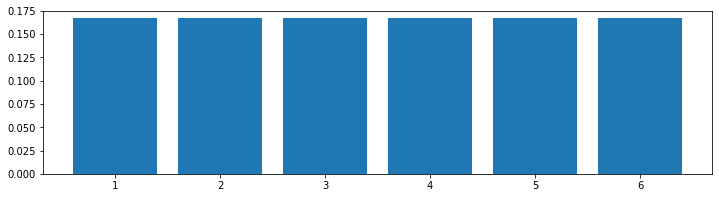

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.bar(x=dice.index, height=dice)

In [18]:
def add_dist(pmf1, pmf2):
    res = Pmf()
    for qs1, ps1 in pmf1.items():
        for qs2, ps2 in pmf2.items():
            qs = qs1 + qs2
            ps = ps1 + ps2
            res[qs] = res(qs) + ps
    return res

In [19]:
twice = dice.add_dist(dice)

<BarContainer object of 11 artists>

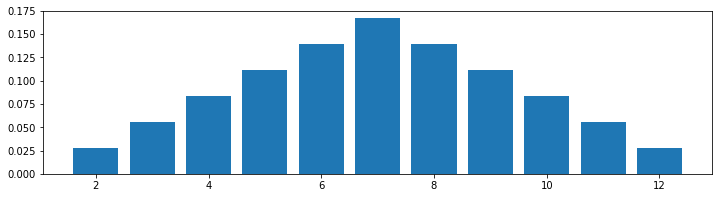

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.bar(x=twice.index, height=twice)

In [34]:
Pmf.add_dist(dice, dice)

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [41]:
n = 35
num_sens = 10
num_insens = n - num_sens

In [43]:
def make_binomial(n, p):
    ks = np.arange(n + 1)
    ps = ss.binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [45]:
dist_sens = make_binomial(num_sens, 0.95)
dist_insens = make_binomial(num_insens, 0.40)
dist_total = Pmf.add_dist(dist_sens, dist_insens)

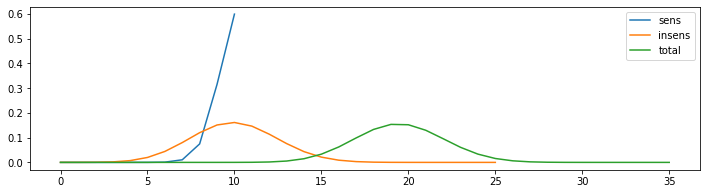

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(dist_sens, label='sens')
ax.plot(dist_insens, label='insens')
ax.plot(dist_total, label='total')
plt.legend()
plt.show()

In [47]:
table = pd.DataFrame()
for num_sens in range(0, n + 1):
    num_insens = n - num_sens
    dist_sens = make_binomial(num_sens, 0.95)
    dist_insens = make_binomial(num_insens, 0.40)
    dist_total = Pmf.add_dist(dist_sens, dist_insens)
    table[num_sens] = dist_total

In [55]:
likelihood1 = table.loc[12, :]
hypos = np.arange(n + 1)
prior = Pmf(1, hypos)

In [56]:
posterior1 = prior * likelihood1
posterior1.normalize()
posterior1.head()

,probs
0,0.232527
1,0.202077
2,0.167522
